<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Example Problem-RandomForest-BlueorRed

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the file
mydata=pd.read_csv("BlueOrRed.csv")
mydata.head()


,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [ ]:
Y=mydata["Undecided"]
X=mydata.iloc[:,1:9]
print(mydata.head())

   Undecided  Age  HomeOwner  Female  Married  HouseholdSize  Income  \
0          1   51          1       1        1              4   171.0   
1          1   37          1       1        1              3    96.0   
2          1   53          1       1        1              6    86.0   
3          0   33          1       1        1              2   176.0   
4          0   46          1       1        1              6   420.0   

   Education  Church  
0         15       0  
1         18       0  
2         20       0  
3         18       1  
4         15       1  


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
X_train.shape    

(7000, 8)

In [ ]:
radom_clf=RandomForestClassifier(max_depth=20,n_estimators=10,random_state=2)
radom_clf.fit(X_train,Y_train)
 



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
prediction=radom_clf.predict(X_train)
prediction
print(prediction)
Prediction=pd.DataFrame(prediction)
Prediction=Prediction.iloc[:,1:9]

[1 1 0 ... 1 0 0]


In [ ]:
pred_prob=radom_clf.predict_proba(X_train)
pred_prob=pd.DataFrame(pred_prob)
print(pred_prob)
pred_class=(pred_prob[1]>=0.5).astype(np.int)
    
    

        0    1
0     0.0  1.0
1     0.0  1.0
2     1.0  0.0
3     0.0  1.0
4     1.0  0.0
5     0.0  1.0
6     0.2  0.8
7     0.0  1.0
8     0.1  0.9
9     1.0  0.0
10    1.0  0.0
11    0.0  1.0
12    1.0  0.0
13    0.0  1.0
14    0.0  1.0
15    1.0  0.0
16    0.9  0.1
17    0.8  0.2
18    0.0  1.0
19    1.0  0.0
20    0.0  1.0
21    0.9  0.1
22    0.0  1.0
23    0.9  0.1
24    0.9  0.1
25    1.0  0.0
26    1.0  0.0
27    0.0  1.0
28    0.0  1.0
29    1.0  0.0
...   ...  ...
6970  0.0  1.0
6971  0.9  0.1
6972  0.0  1.0
6973  1.0  0.0
6974  0.0  1.0
6975  0.9  0.1
6976  0.0  1.0
6977  0.0  1.0
6978  1.0  0.0
6979  0.9  0.1
6980  1.0  0.0
6981  0.9  0.1
6982  0.2  0.8
6983  1.0  0.0
6984  1.0  0.0
6985  0.0  1.0
6986  1.0  0.0
6987  0.1  0.9
6988  1.0  0.0
6989  1.0  0.0
6990  1.0  0.0
6991  0.0  1.0
6992  1.0  0.0
6993  1.0  0.0
6994  1.0  0.0
6995  0.0  1.0
6996  0.9  0.1
6997  0.2  0.8
6998  1.0  0.0
6999  1.0  0.0

[7000 rows x 2 columns]


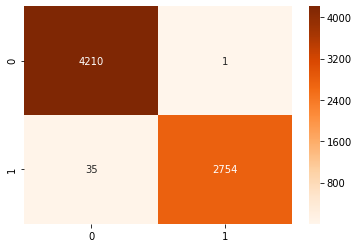

In [ ]:
cm=confusion_matrix(Y_train,prediction)
sns.heatmap(cm,annot=True,cmap="Oranges",fmt=".0f")

In [ ]:
from sklearn.metrics import classification_report
Report=classification_report(Y_train,prediction)
print((Report))  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4211
           1       1.00      0.99      0.99      2789

    accuracy                           0.99      7000
   macro avg       1.00      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [ ]:
importances=radom_clf.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Age","HomeOwner","Female","Married","HouseholdSize",
                    "Income","Education","Church"]
Importance

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,0.053015,0.012336,0.063384,0.004674,0.025684,0.147882,0.508932,0.184093


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"n_estimators":[10,20],
                  "max_depth":range(10,20),
                   "max_features":["sqrt",0.2]}]
radom_clf=RandomForestClassifier()
clf=GridSearchCV(radom_clf,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [ ]:
clf.best_score_

0.9839765282776991

In [ ]:
clf.best_params_

{'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 20}

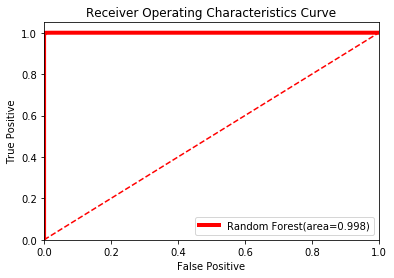

In [ ]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_train.head()
pred_class
rf_auc=roc_auc_score(Y_train.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr,label="Random Forest(area=%0.3f)" % rf_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
radom_clf=RandomForestClassifier(max_depth=20,n_estimators=10,random_state=2)
radom_clf.fit(X_train,Y_train)
 



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
prediction=radom_clf.predict(X_test)
prediction
print(prediction)
Prediction=pd.DataFrame(prediction)
Prediction=Prediction.iloc[:,1:9]

[1 0 0 ... 0 0 0]


In [ ]:
pred_prob=radom_clf.predict_proba(X_test)
pred_prob=pd.DataFrame(pred_prob)
print(pred_prob)
pred_class=(pred_prob[1]>=0.5).astype(np.int)
    
    

         0     1
0     0.00  1.00
1     1.00  0.00
2     1.00  0.00
3     0.00  1.00
4     0.00  1.00
5     0.00  1.00
6     0.00  1.00
7     0.00  1.00
8     0.90  0.10
9     0.00  1.00
10    0.10  0.90
11    1.00  0.00
12    1.00  0.00
13    0.00  1.00
14    0.00  1.00
15    1.00  0.00
16    0.20  0.80
17    0.10  0.90
18    1.00  0.00
19    0.90  0.10
20    1.00  0.00
21    1.00  0.00
22    0.90  0.10
23    0.00  1.00
24    0.90  0.10
25    0.90  0.10
26    0.80  0.20
27    0.90  0.10
28    1.00  0.00
29    0.00  1.00
...    ...   ...
2970  0.00  1.00
2971  1.00  0.00
2972  0.10  0.90
2973  0.00  1.00
2974  0.00  1.00
2975  1.00  0.00
2976  1.00  0.00
2977  1.00  0.00
2978  1.00  0.00
2979  0.90  0.10
2980  1.00  0.00
2981  1.00  0.00
2982  1.00  0.00
2983  0.22  0.78
2984  0.00  1.00
2985  0.00  1.00
2986  0.80  0.20
2987  0.00  1.00
2988  1.00  0.00
2989  1.00  0.00
2990  0.00  1.00
2991  0.90  0.10
2992  0.90  0.10
2993  1.00  0.00
2994  0.80  0.20
2995  0.00  1.00
2996  0.00  1.

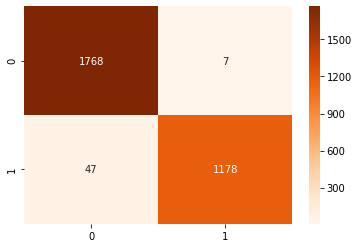

In [ ]:
cm=confusion_matrix(Y_test,prediction)
sns.heatmap(cm,annot=True,cmap="Oranges",fmt=".0f")

In [ ]:
from sklearn.metrics import classification_report
Report=classification_report(Y_test,prediction)
print((Report))  

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1775
           1       0.99      0.96      0.98      1225

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
importances=radom_clf.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Age","HomeOwner","Female","Married","HouseholdSize",
                    "Income","Education","Church"]
Importance

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,0.053015,0.012336,0.063384,0.004674,0.025684,0.147882,0.508932,0.184093
